# Project: Analyzing FBI NICS Firearm Background Check Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. 

Data Source:
* [GitHub](https://github.com/BuzzFeedNews/nics-firearm-background-checks)
* [NICS](https://www.fbi.gov/services/cjis/nics)

The FBI provides data on the number of firearm checks by month, state, and type. The data represents the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale. Despite some caveats listed with the dataset, it is the best proxy for total gun sales.

The data has been supplemented with state level data from [census.gov](https://www.census.gov/). It contains several
variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

### Research Questions
* Which states sell the most guns and least guns in the U.S.?
* What is the overall trend of gun purchases?
* Which states have has the highest growth in gun sales?
* What census data is most associated with high guns per capita?

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

gun_data was provided in form of an excel file, u.s. census data was provided in csv file. 
Both these files were imported using pandas library

### General Properties

In [2]:
# Reading the excel file and saving in dataframe
gun_data = pd.read_excel("Resources/gun-data.xlsx")
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
# Reading csv file and saving in a dataframe
census_data = pd.read_csv("Resources/u.s.-census-data.csv")
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


#### Exploring gun data

In [4]:
gun_data.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [5]:
gun_data.month.max()

'2017-09'

In [6]:
gun_data.month.min()

'1998-11'

Dataset contains data from November 1998 to September 2017

In [7]:
gun_data.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

The columns contain the number of background checks initiated for different types of firearms. 
Description of the columns is available on the GitHub [link](https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/pdfs/NICS_Firearm_Checks_-_Month_Year_by_State_Type.pdf)

In [8]:
gun_data.sum()

month                        2017-092017-092017-092017-092017-092017-092017...
state                        AlabamaAlaskaArizonaArkansasCaliforniaColorado...
permit                                                             7.99202e+07
permit_recheck                                                     1.28255e+06
handgun                                                            7.40531e+07
long_gun                                                             9.737e+07
other                                                              1.98259e+06
multiple                                                               3353513
admin                                                                   733988
prepawn_handgun                                                          50897
prepawn_long_gun                                                         82572
prepawn_other                                                              847
redemption_handgun                                  

After permit registrations, most background checks are initiated for the sale of long guns 
and handguns. Based on this information, it can be concluded that long guns are the most purchased firearm in 
the U.S.

In [9]:
# Exploring mean values per month across the states for all gun registrations
gun_data.groupby(['state']).mean()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,4614.277533,37.45,9788.709251,11568.409692,395.78,463.568282,0.140969,22.078125,33.036458,0.279570,...,0.000000,0.055556,0.000000,4.48,4.14,0.38,0.311111,0.24,0.146341,29542.198238
Alaska,58.819383,1.10,1914.546256,2520.590308,159.70,127.330396,0.083700,5.432292,7.619792,0.010753,...,0.424242,0.000000,0.000000,3.92,4.90,0.20,0.066667,0.12,0.024390,5011.643172
Arizona,3129.995595,335.05,7847.876652,6523.180617,568.32,374.356828,29.264317,7.354167,4.739583,0.193548,...,0.090909,0.000000,0.000000,6.00,3.78,0.74,0.466667,0.32,0.073171,19496.537445
Arkansas,2237.669604,679.75,4253.674009,7327.118943,130.53,272.770925,9.453744,8.343750,20.807292,0.129032,...,0.000000,0.000000,0.000000,3.98,4.30,0.32,0.266667,0.26,0.097561,16531.422907
California,28768.911894,0.00,26039.118943,26153.171806,3426.35,915.700441,73.480176,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,83762.392070
Colorado,1880.925110,0.00,11138.422907,12008.955947,604.79,1351.854626,12.889381,0.197917,0.093750,0.000000,...,0.636364,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,26689.348018
Connecticut,7027.621145,68.35,3873.392070,2810.995595,168.77,35.348018,127.876652,0.000000,0.000000,0.666667,...,0.000000,0.000000,0.000000,0.60,0.74,0.06,0.911111,0.50,0.121951,13956.502203
Delaware,100.088106,0.00,916.779736,1067.114537,55.71,36.427313,0.185022,0.505208,0.541667,0.000000,...,0.000000,0.000000,0.000000,28.20,10.88,1.28,0.555556,0.22,0.048780,2164.621145
District of Columbia,1.453744,0.00,20.132159,2.665198,0.01,0.176211,0.237885,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,24.674009


In [10]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [11]:
# Adding a new column after changing the datatype of month column to timestamp
gun_data['Month'] = pd.to_datetime(gun_data['month'])
gun_data

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Month
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017-09-01
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017-09-01
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017-09-01
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017-09-01
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1998-11-01
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361,1998-11-01
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408,1998-11-01
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,1998-11-01


### Replacing NaN values in four columns 'handgun', 'long_gun', 'other' and 'multiple' with 0

In [12]:
gun_data.handgun.fillna(0, inplace = True)
gun_data.long_gun.fillna(0, inplace = True)
gun_data.other.fillna(0, inplace = True)
gun_data.multiple.fillna(0, inplace = True)

In [13]:
# Checking to verify that there are no null values in those four columns
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other  

For calculating the guns sales, I am only taking into account four columns 'handgun', 'long_gun','other' and 'multiple'. The analysis does not include prepawn, redemption, returned, rental or private sale guns.

In [14]:
# Adding new column
gun_data['gun_sales'] = gun_data.handgun + gun_data.long_gun \
                        + gun_data.other + gun_data.multiple
gun_data

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Month,gun_sales
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017-09-01,12592.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017-09-01,5629.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017-09-01,20560.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017-09-01,10941.0
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017-09-01,64730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,0.0,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1998-11-01,24.0
12481,1998-11,Washington,1.0,NaN,65.0,286.0,0.0,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361,1998-11-01,359.0
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,0.0,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408,1998-11-01,405.0
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,0.0,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,1998-11-01,241.0


### Taking the subset of data with three columns

In [15]:
gun_data_subset = gun_data[['month', 'state', 'gun_sales']]
gun_data_subset

,month,state,gun_sales
0,2017-09,Alabama,12592.0
1,2017-09,Alaska,5629.0
2,2017-09,Arizona,20560.0
3,2017-09,Arkansas,10941.0
4,2017-09,California,64730.0
...,...,...,...
12480,1998-11,Virginia,24.0
12481,1998-11,Washington,359.0
12482,1998-11,West Virginia,405.0
12483,1998-11,Wisconsin,241.0


In [16]:
# Tranforming gun_data column by splitting string into two columns for month and date
# This was done to aggregate the gun sales by year
date_df = gun_data_subset.month.str.split('-', expand=True)

# Renaming columns
date_df.columns = ['year', 'month_1']

# Adding new columns to gun_data_subset 
gun_data_year =  gun_data_subset.assign(year = date_df.year)

gun_data_year

,month,state,gun_sales,year
0,2017-09,Alabama,12592.0,2017
1,2017-09,Alaska,5629.0,2017
2,2017-09,Arizona,20560.0,2017
3,2017-09,Arkansas,10941.0,2017
4,2017-09,California,64730.0,2017
...,...,...,...,...
12480,1998-11,Virginia,24.0,1998
12481,1998-11,Washington,359.0,1998
12482,1998-11,West Virginia,405.0,1998
12483,1998-11,Wisconsin,241.0,1998


#### Cleaning census data

In [17]:
census_data_subset = census_data[['Fact', 'Texas', 'California',\
                                  'Pennsylvania', 'Florida', 'Ohio']]
census_data_subset = census_data_subset.set_index('Fact')
census_data_subset.head(10)

,Texas,California,Pennsylvania,Florida,Ohio
Fact,,,,,
"Population estimates, July 1, 2016, (V2016)","27,862,596","39,250,017",12784227,"20,612,439",11614373
"Population estimates base, April 1, 2010, (V2016)","25,146,100","37,254,522",12702857,"18,804,592",11536727
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",10.80%,5.40%,0.006,9.60%,0.007
"Population, Census, April 1, 2010","25,145,561","37,253,956",12702379,"18,801,310",11536504
"Persons under 5 years, percent, July 1, 2016, (V2016)",7.20%,6.30%,0.056,5.50%,0.06
"Persons under 5 years, percent, April 1, 2010",7.70%,6.80%,0.057,5.70%,0.062
"Persons under 18 years, percent, July 1, 2016, (V2016)",26.20%,23.20%,0.209,20.10%,0.225
"Persons under 18 years, percent, April 1, 2010",27.30%,25.00%,0.22,21.30%,0.237
"Persons 65 years and over, percent, July 1, 2016, (V2016)",12.00%,13.60%,0.174,19.90%,0.162


In [18]:
census_data_subset_T = census_data_subset.T
census_data_subset_T = census_data_subset_T.reset_index()
census_data_subset_T

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Texas,"27,862,596","25,146,100",10.80%,"25,145,561",7.20%,7.70%,26.20%,27.30%,12.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pennsylvania,12784227,12702857,0.006,12702379,0.056,0.057,0.209,0.22,0.174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ohio,11614373,11536727,0.007,11536504,0.06,0.062,0.225,0.237,0.162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Column names have special chararcters and it gave a Key Error while tring to reference the columns. So, the special characters in column names were replaced by '_'. 
Code reference: https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd

In [19]:
# Renaming columns
census_data_subset_T.columns = census_data_subset_T.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [20]:
# Renaming columns
census_data_subset_T = census_data_subset_T.rename(columns={'population_estimates,_july_1,_2016,__v2016': 'population'})

In [21]:
# Population column needs to be converted to float to make the calculations later.
census_data_subset_T['population'] = census_data_subset_T['population'].str.replace(',', '')
census_data_subset_T['population'] = census_data_subset_T['population'].astype(float)

In [22]:
census_data_subset_T

Fact,index,population,"population_estimates_base,_april_1,_2010,__v2016","population,_percent_change_-_april_1,_2010_estimates_base_to_july_1,_2016,__v2016","population,_census,_april_1,_2010","persons_under_5_years,_percent,_july_1,_2016,__v2016","persons_under_5_years,_percent,_april_1,_2010","persons_under_18_years,_percent,_july_1,_2016,__v2016","persons_under_18_years,_percent,_april_1,_2010","persons_65_years_and_over,_percent,__july_1,_2016,__v2016",...,NaN,value_flags,-,d,f,fn,NaN,s,x,z
0,Texas,27862596.0,"25,146,100",10.80%,"25,145,561",7.20%,7.70%,26.20%,27.30%,12.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,California,39250017.0,"37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pennsylvania,12784227.0,12702857,0.006,12702379,0.056,0.057,0.209,0.22,0.174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Florida,20612439.0,"18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ohio,11614373.0,11536727,0.007,11536504,0.06,0.062,0.225,0.237,0.162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis

In [23]:
gun_data.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Month,gun_sales
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017-09-01,12592.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017-09-01,5629.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017-09-01,20560.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017-09-01,10941.0
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017-09-01,64730.0
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873,2017-09-01,31268.0
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117,2017-09-01,7101.0
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502,2017-09-01,3086.0
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61,2017-09-01,60.0
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390,2017-09-01,61188.0


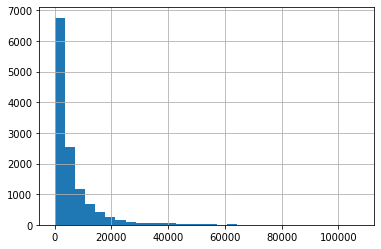

In [24]:
gun_data.handgun.hist(bins=30);

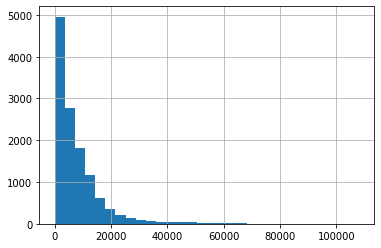

In [25]:
gun_data.long_gun.hist(bins=30);

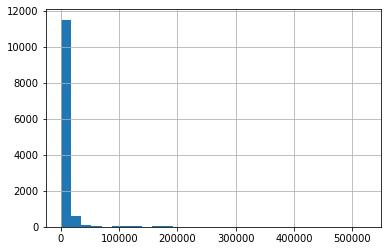

In [26]:
gun_data.permit.hist(bins=30);

### Research Question 1. Which states sell the most guns and least guns in the U.S.?

In [27]:
state_sales_df = gun_data_subset.groupby(['state']).sum().sort_values('gun_sales',ascending=False)

#### States with most gun sales

In [28]:
state_sales_df.head(10)

,gun_sales
state,
Texas,14706655.0
California,12398149.0
Pennsylvania,11614431.0
Florida,10135070.0
Ohio,7722224.0
Tennessee,6116854.0
Virginia,5852398.0
Missouri,5675747.0
Colorado,5621805.0


#### States with least gun sales

In [29]:
state_sales_df.tail(10)

,gun_sales
state,
Nebraska,557275.0
Vermont,484176.0
Delaware,464184.0
Rhode Island,287753.0
Puerto Rico,193914.0
Guam,14987.0
District of Columbia,5216.0
Virgin Islands,3614.0
Mariana Islands,459.0


### Research Question 2. What is the overall trend in gun sales?

In [30]:
month_sales = gun_data[['Month', 'state', 'gun_sales']].groupby(['Month']).sum().sort_values('gun_sales',ascending=False)

In [31]:
month_sales.reset_index(inplace = True)

In [32]:
month_sales.sort_values('Month', inplace=True)

In [33]:
month_sales.reset_index(drop=True)

,Month,gun_sales
0,1998-11-01,19043.0
1,1998-12-01,792467.0
2,1999-01-01,501909.0
3,1999-02-01,594085.0
4,1999-03-01,627348.0
...,...,...
222,2017-05-01,926516.0
223,2017-06-01,947107.0
224,2017-07-01,845007.0
225,2017-08-01,950331.0


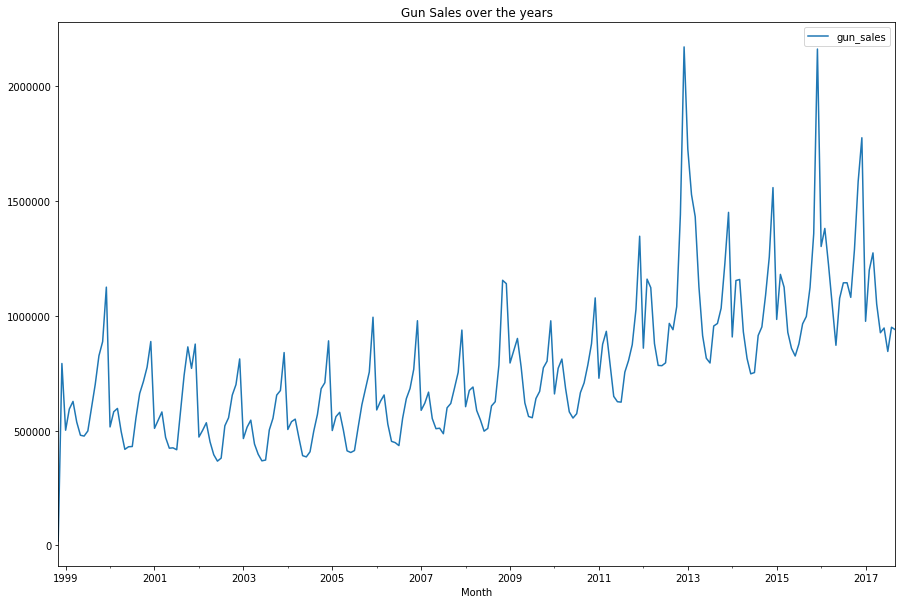

In [34]:
month_sales.plot(x='Month', y='gun_sales', kind='line', figsize=(15,10), title='Gun Sales over the years');

In [35]:
max_sales = month_sales.sort_values('gun_sales', ascending= False)
max_sales.head(20)

,Month,gun_sales
0,2012-12-01,2171293.0
1,2015-12-01,2162066.0
2,2016-12-01,1775692.0
3,2013-01-01,1726532.0
4,2016-11-01,1584876.0
5,2014-12-01,1558584.0
6,2013-02-01,1527967.0
7,2013-12-01,1450709.0
8,2012-11-01,1440978.0
9,2013-03-01,1431834.0


The sales of guns has increased over the years. The month wise plot of gun sales shows a seasonal pattern. Based on the data, it appears that most gun sales are during the winter months - December and January.
    
Compared to other years, the data shows spikes in gun sales for Dec 2012 and Dec 2015

### Research Question 3. Which states have has the highest growth in gun sales?

In [36]:
gun_data_year

,month,state,gun_sales,year
0,2017-09,Alabama,12592.0,2017
1,2017-09,Alaska,5629.0,2017
2,2017-09,Arizona,20560.0,2017
3,2017-09,Arkansas,10941.0,2017
4,2017-09,California,64730.0,2017
...,...,...,...,...
12480,1998-11,Virginia,24.0,1998
12481,1998-11,Washington,359.0,1998
12482,1998-11,West Virginia,405.0,1998
12483,1998-11,Wisconsin,241.0,1998


In [37]:
# Grouping the gun sales by year and state
year_sales = gun_data_year.groupby(['year', 'state']).sum()
year_sales.reset_index(inplace = True)
year_sales

,year,state,gun_sales
0,1998,Alabama,36568.0
1,1998,Alaska,3981.0
2,1998,Arizona,15710.0
3,1998,Arkansas,21752.0
4,1998,California,62079.0
...,...,...,...
1095,2017,Virginia,357779.0
1096,2017,Washington,260685.0
1097,2017,West Virginia,109437.0
1098,2017,Wisconsin,244999.0


In [38]:
# Function to calculate gun sales and growth for different states
def state_sales(state):
    state_df = year_sales.loc[year_sales['state']==state].reset_index(drop=True)
    # Droping data for year 2017 as data for last quarter 2017 is not available
    state_df.drop(state_df.index[-1], inplace=True)
    # Droping dat for year 1998 as data is only available for Nov, Dec
    state_df.drop(state_df.index[0], inplace=True)
    print(state_df)
    print()
    
    # Plot
    state_df.plot(x='year', y='gun_sales', kind='line', figsize=(10,5),\
           title=f'Gun Sales in {state} over the years',\
          xticks= np.arange(0,18));
    
    # Growth in gun sales in Texas from 1999 to 2016
    state_df1 = state_df.set_index('year')
    growth = (state_df1.loc['2016', 'gun_sales'] - state_df1.loc['1999', 'gun_sales'])*100/state_df1.loc['1999', 'gun_sales']
    print(f"{state} growth in sales from 1999 to 2016 is {growth.round(2)}%")

#### Analysing the gun sales over the years for states with most gun sales

Gun Sales in Texas

    year  state  gun_sales
1   1999  Texas   648748.0
2   2000  Texas   585119.0
3   2001  Texas   580001.0
4   2002  Texas   466148.0
5   2003  Texas   475383.0
6   2004  Texas   483486.0
7   2005  Texas   554319.0
8   2006  Texas   586670.0
9   2007  Texas   597502.0
10  2008  Texas   751873.0
11  2009  Texas   768226.0
12  2010  Texas   731465.0
13  2011  Texas   869788.0
14  2012  Texas  1133239.0
15  2013  Texas  1221104.0
16  2014  Texas  1074802.0
17  2015  Texas  1169545.0
18  2016  Texas  1192516.0

Texas growth in sales from 1999 to 2016 is 83.82%


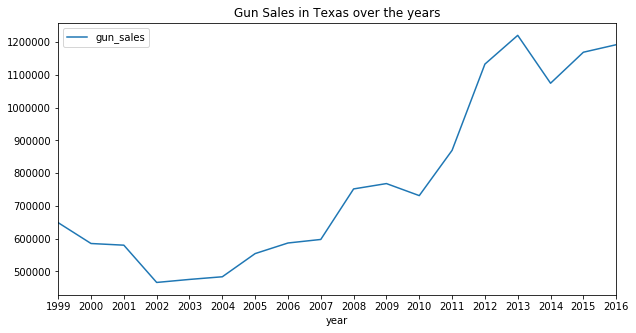

In [39]:
state_sales('Texas')

Gun Sales in California

    year       state  gun_sales
1   1999  California   782012.0
2   2000  California   631361.0
3   2001  California   618295.0
4   2002  California   492444.0
5   2003  California   368417.0
6   2004  California   396770.0
7   2005  California   458983.0
8   2006  California   445463.0
9   2007  California   578137.0
10  2008  California   445137.0
11  2009  California   496998.0
12  2010  California   520617.0
13  2011  California   624343.0
14  2012  California   799585.0
15  2013  California   934548.0
16  2014  California   914198.0
17  2015  California   874642.0
18  2016  California  1326612.0

California growth in sales from 1999 to 2016 is 69.64%


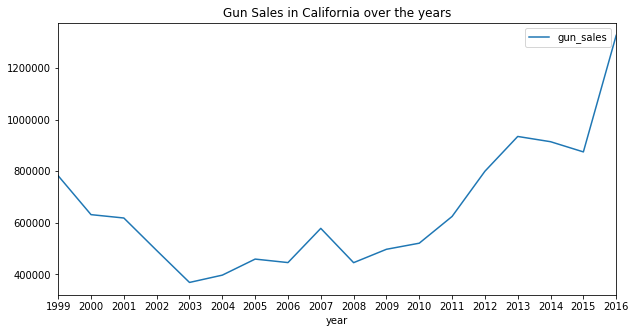

In [40]:
state_sales('California')

Gun Sales in Pennsylvania

    year         state  gun_sales
1   1999  Pennsylvania   531460.0
2   2000  Pennsylvania   476870.0
3   2001  Pennsylvania   505964.0
4   2002  Pennsylvania   561902.0
5   2003  Pennsylvania   511518.0
6   2004  Pennsylvania   501037.0
7   2005  Pennsylvania   479756.0
8   2006  Pennsylvania   517853.0
9   2007  Pennsylvania   559954.0
10  2008  Pennsylvania   595797.0
11  2009  Pennsylvania   639417.0
12  2010  Pennsylvania   624104.0
13  2011  Pennsylvania   715722.0
14  2012  Pennsylvania   875136.0
15  2013  Pennsylvania   768977.0
16  2014  Pennsylvania   659629.0
17  2015  Pennsylvania   719396.0
18  2016  Pennsylvania   800622.0

Pennsylvania growth in sales from 1999 to 2016 is 50.65%


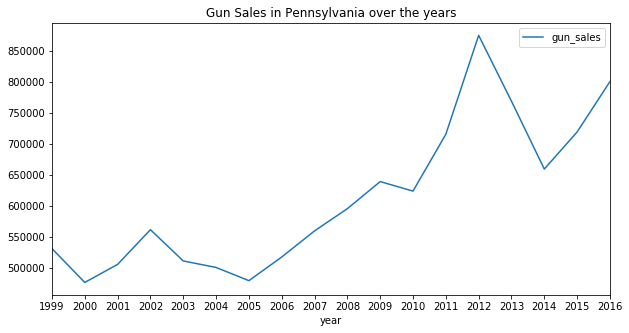

In [41]:
state_sales('Pennsylvania')

Gun Sales in Florida

    year    state  gun_sales
1   1999  Florida   260824.0
2   2000  Florida   250012.0
3   2001  Florida   289386.0
4   2002  Florida   272056.0
5   2003  Florida   284457.0
6   2004  Florida   306154.0
7   2005  Florida   360207.0
8   2006  Florida   401191.0
9   2007  Florida   415465.0
10  2008  Florida   487532.0
11  2009  Florida   534648.0
12  2010  Florida   534587.0
13  2011  Florida   611512.0
14  2012  Florida   802877.0
15  2013  Florida   870727.0
16  2014  Florida   786258.0
17  2015  Florida   900129.0
18  2016  Florida  1046121.0

Florida growth in sales from 1999 to 2016 is 301.08%


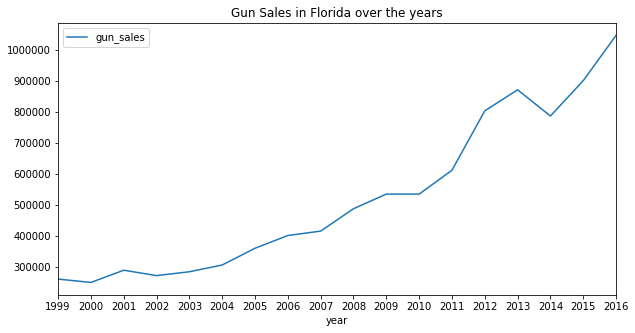

In [42]:
state_sales('Florida')

Gun Sales in Ohio

    year state  gun_sales
1   1999  Ohio   297597.0
2   2000  Ohio   274162.0
3   2001  Ohio   287950.0
4   2002  Ohio   276270.0
5   2003  Ohio   278242.0
6   2004  Ohio   306669.0
7   2005  Ohio   294853.0
8   2006  Ohio   306931.0
9   2007  Ohio   308966.0
10  2008  Ohio   332149.0
11  2009  Ohio   375421.0
12  2010  Ohio   370873.0
13  2011  Ohio   445078.0
14  2012  Ohio   602255.0
15  2013  Ohio   653453.0
16  2014  Ohio   567779.0
17  2015  Ohio   624029.0
18  2016  Ohio   678859.0

Ohio growth in sales from 1999 to 2016 is 128.11%


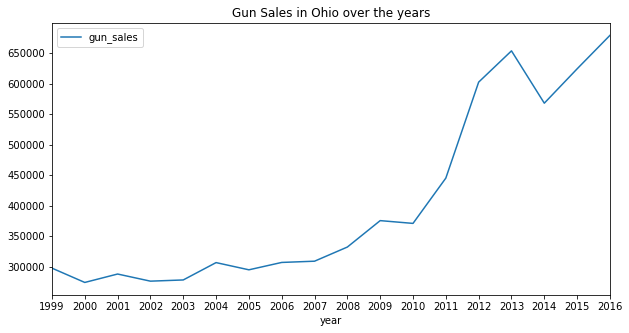

In [43]:
state_sales('Ohio')

State with maximum growth in sales is Florida.
    
Gun Sales in Florida were 260824 in year 1999. This has grown by over 300% in year 2016. Gun Sales in year 2016 are 1046121.

### Research Question 4. What census data is most associated with high guns per capita?

Comparing the top 5 states with most gun sales

In [44]:
# State wise total sales calculated 
state_sales_subset = state_sales_df.head(5)
state_sales_subset = state_sales_subset.reset_index()
state_sales_subset

,state,gun_sales
0,Texas,14706655.0
1,California,12398149.0
2,Pennsylvania,11614431.0
3,Florida,10135070.0
4,Ohio,7722224.0


In [45]:
# Merging the state_sales_subset dataframe with census_data_subset_T dataframe to calculate guns per capita
guns_population = pd.merge(state_sales_subset, census_data_subset_T,\
                           left_on='state', right_on='index')
guns_population

,state,gun_sales,index,population,"population_estimates_base,_april_1,_2010,__v2016","population,_percent_change_-_april_1,_2010_estimates_base_to_july_1,_2016,__v2016","population,_census,_april_1,_2010","persons_under_5_years,_percent,_july_1,_2016,__v2016","persons_under_5_years,_percent,_april_1,_2010","persons_under_18_years,_percent,_july_1,_2016,__v2016",...,NaN,value_flags,-,d,f,fn,NaN,s,x,z
0,Texas,14706655.0,Texas,27862596.0,"25,146,100",10.80%,"25,145,561",7.20%,7.70%,26.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,California,12398149.0,California,39250017.0,"37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pennsylvania,11614431.0,Pennsylvania,12784227.0,12702857,0.006,12702379,0.056,0.057,0.209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Florida,10135070.0,Florida,20612439.0,"18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ohio,7722224.0,Ohio,11614373.0,11536727,0.007,11536504,0.06,0.062,0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Selections columns of interest
guns_population = guns_population[['state', 'gun_sales', 'population']].copy()
guns_population

,state,gun_sales,population
0,Texas,14706655.0,27862596.0
1,California,12398149.0,39250017.0
2,Pennsylvania,11614431.0,12784227.0
3,Florida,10135070.0,20612439.0
4,Ohio,7722224.0,11614373.0


In [47]:
# Calculating guns per capita
guns_population['guns_per_capita'] = guns_population['gun_sales'] / guns_population['population']
guns_population

,state,gun_sales,population,guns_per_capita
0,Texas,14706655.0,27862596.0,0.527828
1,California,12398149.0,39250017.0,0.315876
2,Pennsylvania,11614431.0,12784227.0,0.908497
3,Florida,10135070.0,20612439.0,0.491697
4,Ohio,7722224.0,11614373.0,0.664885


The guns per capita for Pennsylvania state is 0.91

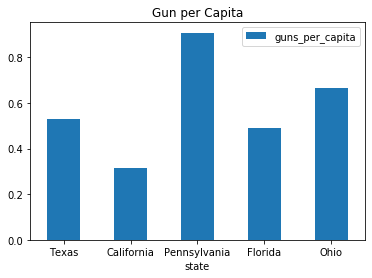

In [48]:
guns_population.plot.bar(x='state', y='guns_per_capita', rot=0, title='Gun per Capita');

<a id='conclusions'></a>
## Conclusions

> Texas, California, Pennsylvania, Florida and Ohio are the top 5 stats in the U.S where the most guns are sold.

> The sales of guns has increased over the years. The month wise plot of gun sales shows a seasonal pattern. Based on the data, it appears that most gun sales are during the winter months - December and January.

> Florida has a high growth in gun sales, ie. 301.08%. The number of guns sold in year 1999 were  260,824 and increased to 1,046,121in 2016.

> Sales droped in year 2014 for all the 5 states with most gun sales. Related article by [CNN](https://money.cnn.com/2014/02/14/news/companies/guns-ammo-sales/)

> **Limitations**

>* The dataset provides data on the number of firearm checks by month, state, and type. The data represents the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Hence, it not possible to get the actual number of guns sold in any state as depending on the state laws, background check may not be required for some sales.

>* The data provided is aggregated month wise. Weekly or daily analysis of gun registeration cannot be performed using the given data.